In [16]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
pd.options.display.max_columns = 100
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
pd.options.display.max_rows = 100
from itertools import islice
import urllib2
from bs4 import BeautifulSoup
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from DatumBox import DatumBox
import re
from urlparse import urlparse
import seaborn as sns # To have more than seven colors in pie diagram
import plotly.plotly as py # For Gantt Chart
import plotly.figure_factory as ff # For Gantt Chart
import sklearn

<h2>1. Text Similarity Comparison </h2>

<b style = "color : red" > 1. Read the Data from the CSV file with pandas </b>

In [17]:
test_data = pd.read_csv('lab_pc5.csv')
#test_data.head()
#test_data.pop('[]"_id"')
#test_data.pop('<ROOT>_id')
#test_data.pop('typedCount')
test_data.head()

,id,lastVisitTime,title,typedCount,url,visitCount
0,759,8/25/2017 8:03:59 AM,NaN,0,https://chrome.google.com/webstore/detail/expo...,1
1,758,8/25/2017 8:03:49 AM,Export History/Bookmarks to JSON/CSV*/XLS* - C...,0,https://chrome.google.com/webstore/detail/expo...,1
2,757,8/25/2017 8:03:39 AM,NaN,0,https://chrome.google.com/webstore/search/expo...,1
3,756,8/25/2017 8:03:31 AM,Chrome Web Store - export history,0,https://chrome.google.com/webstore/category/ex...,1
4,755,8/25/2017 8:03:28 AM,Chrome Web Store,0,https://chrome.google.com/webstore?utm_source=...,1


<b style = "color : red" > 3. Cleaning up the data by removing the unwanted fields </b>

In [18]:
#test_data = test_data.drop(['[]"_id"','<ROOT>_id','typedCount','id'],axis=1)
#data = data.dropna()
#data.drop(48)
#test_data.pop('visitCount')
test_data.pop('typedCount')
test_data.head()

,id,lastVisitTime,title,url,visitCount
0,759,8/25/2017 8:03:59 AM,NaN,https://chrome.google.com/webstore/detail/expo...,1
1,758,8/25/2017 8:03:49 AM,Export History/Bookmarks to JSON/CSV*/XLS* - C...,https://chrome.google.com/webstore/detail/expo...,1
2,757,8/25/2017 8:03:39 AM,NaN,https://chrome.google.com/webstore/search/expo...,1
3,756,8/25/2017 8:03:31 AM,Chrome Web Store - export history,https://chrome.google.com/webstore/category/ex...,1
4,755,8/25/2017 8:03:28 AM,Chrome Web Store,https://chrome.google.com/webstore?utm_source=...,1


<b style = "color : red" >4. Calculating the amount of time spent on each URL</b>

In [19]:
i_max = test_data.shape[0]
time_diff = []

for i in range (i_max-1,0,-1):
    j = i-1
    i_base = test_data.iloc[i]['lastVisitTime']
    j_base = test_data.iloc[j]['lastVisitTime']
    if (i_base.split('/')[0] == j_base.split('/')[0] ):
        if (i_base .split('/')[1] == j_base.split('/')[1] ):
            if (i_base.split('/')[2].split(' ')[1].split(':')[0] == j_base.split('/')[2].split(' ')[1].split(':')[0]):
                j_min = int (j_base.split('/')[2].split(' ')[1].split(':')[1]) * 60 
                j_sec = int (j_base.split('/')[2].split(' ')[1].split(':')[2])
                j_time = j_min + j_sec
            

                i_min = int (i_base.split('/')[2].split(' ')[1].split(':')[1]) * 60 
                i_sec = int (i_base.split('/')[2].split(' ')[1].split(':')[2])
                i_time = i_min + i_sec
            
                time_diff.append(j_time - i_time)
            else:
                time_diff.append('NA')
        else:
             time_diff.append('NA')
    else:
         time_diff.append('NA')

time_diff.append('NA')

time_diff = time_diff[::-1]
td = pd.Series(time_diff)
test_data['timeSpent'] = td.values

In [20]:
#test_data.pop('visitCount')
test_data.head()

,id,lastVisitTime,title,url,visitCount,timeSpent
0,759,8/25/2017 8:03:59 AM,NaN,https://chrome.google.com/webstore/detail/expo...,1,NA
1,758,8/25/2017 8:03:49 AM,Export History/Bookmarks to JSON/CSV*/XLS* - C...,https://chrome.google.com/webstore/detail/expo...,1,10
2,757,8/25/2017 8:03:39 AM,NaN,https://chrome.google.com/webstore/search/expo...,1,10
3,756,8/25/2017 8:03:31 AM,Chrome Web Store - export history,https://chrome.google.com/webstore/category/ex...,1,8
4,755,8/25/2017 8:03:28 AM,Chrome Web Store,https://chrome.google.com/webstore?utm_source=...,1,3


<b style = "color : red" >5. Finding Internal Category</b>

In [21]:
test_data['Internal_category'] = ""
for i in range(0,len(test_data)):
    temp = test_data['url'][i]
    if("facebook" in temp):
        test_data['Internal_category'][i] = "Social Network"
    elif ("Facebook" in temp):
        test_data['Internal_category'][i] = "Social Network"
    elif("google" in temp):
        test_data['Internal_category'][i] = "Search"
    elif("gmail" in temp):
        test_data['Internal_category'][i] = "Mail"
    elif('home' in temp):
        test_data['Internal_category'][i] = "Local"
    else:
        test_data['Internal_category'][i] = "General"  
    
test_data.head()

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,id,lastVisitTime,title,url,visitCount,timeSpent,Internal_category
0,759,8/25/2017 8:03:59 AM,NaN,https://chrome.google.com/webstore/detail/expo...,1,NA,Search
1,758,8/25/2017 8:03:49 AM,Export History/Bookmarks to JSON/CSV*/XLS* - C...,https://chrome.google.com/webstore/detail/expo...,1,10,Search
2,757,8/25/2017 8:03:39 AM,NaN,https://chrome.google.com/webstore/search/expo...,1,10,Search
3,756,8/25/2017 8:03:31 AM,Chrome Web Store - export history,https://chrome.google.com/webstore/category/ex...,1,8,Search
4,755,8/25/2017 8:03:28 AM,Chrome Web Store,https://chrome.google.com/webstore?utm_source=...,1,3,Search


<b style = "color : red" >6. Finding the Sessions</b>

In [25]:
count = 0

test_data['session'] = ""
for i in range(0,len(test_data)):
    if test_data['timeSpent'][i] is 'NA':
        count+=1

    if (test_data['timeSpent'][i] is not 'NA'):
        test_data['session'][i] = count
    else:
        test_data['session'][i] = 0
    

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [26]:
test_data

,id,lastVisitTime,title,url,visitCount,timeSpent,Internal_category,session
0,759,8/25/2017 8:03:59 AM,NaN,https://chrome.google.com/webstore/detail/expo...,1,NA,Search,0
1,758,8/25/2017 8:03:49 AM,Export History/Bookmarks to JSON/CSV*/XLS* - C...,https://chrome.google.com/webstore/detail/expo...,1,10,Search,1
2,757,8/25/2017 8:03:39 AM,NaN,https://chrome.google.com/webstore/search/expo...,1,10,Search,1
3,756,8/25/2017 8:03:31 AM,Chrome Web Store - export history,https://chrome.google.com/webstore/category/ex...,1,8,Search,1
4,755,8/25/2017 8:03:28 AM,Chrome Web Store,https://chrome.google.com/webstore?utm_source=...,1,3,Search,1
5,686,7/15/2017 6:48:23 PM,Oxygen - Video Song | Kavan | Hiphop Tamizha |...,https://www.youtube.com/watch?v=7M9hc_PC_Vg,1,NA,General,0
6,683,7/15/2017 6:48:23 PM,Meesaya Murukku - Enna Nadanthalum (Promo Musi...,https://www.youtube.com/watch?v=FndzeAmOCLs,2,0,General,2
7,685,7/15/2017 6:47:17 PM,NaN,https://www.google.co.in/search?q=gazetteers.&...,1,66,Search,2
8,684,7/15/2017 6:47:08 PM,gazetteers. - Google Search,https://www.google.co.in/search?q=gazetteers.&...,1,9,Search,2
9,682,7/15/2017 6:44:03 PM,Azhage Tamil album song(Korean Mix) - YouTube,https://www.youtube.com/watch?v=9P4oO9F5aSM,2,185,General,2


<b style = "color : green" >(I) Text Extract Function</b>

In [140]:
import urllib2
from bs4 import BeautifulSoup

# Clean Up Function
def clean_up(text1):
    char_dic = [' ','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    temp = []
    res = ""
    temp = text1.split(' ')

    for i in temp:
        flag = 0
        for j in str(i):
            if j not in char_dic:
                flag += 1
        if (flag == 0):
            res += i
        res += " "
            
    return res

def text_extract(url):
    try:
        page3 = urllib2.urlopen(url).read()
    
        soup3 = BeautifulSoup(page3,"html.parser")

        final_res = ""
        #If-Else Condition to Check null case
        if (soup3 is None):
            print "Its NONE!"
        else:
     
            
            if (soup3.h1 is not None):
                if (clean_up(str(soup3.h1)) is not None):
                    final_res += clean_up(str(soup3.h1))
            
            if (soup3.h2 is not None):
                if (clean_up(str(soup3.h2)) is not None):
                    final_res += clean_up(str(soup3.h2))
            
            if (soup3.h3 is not None):
                if (clean_up(str(soup3.h3)) is not None):
                    final_res += clean_up(str(soup3.h3))

            if (soup3.h4 is not None):
                if (clean_up(str(soup3.h4)) is not None):
                    final_res += clean_up(str(soup3.h4))

            if (soup3.h5 is not None):
                if (clean_up(str(soup3.h5)) is not None):
                    final_res += clean_up(str(soup3.h5))

            if (soup3.h6 is not None):
                if (clean_up(str(soup3.h6)) is not None):
                    final_res += clean_up(str(soup3.h6))
            

            if (soup3.p is not None):
                if (clean_up(str(soup3.p)) is not None):
                    final_res += clean_up(str(soup3.p))
            

            if(soup3.title is not None):
                if (clean_up(str(soup3.title)) is not None):
                    final_res += clean_up(str(soup3.title))
            

            flag = ""

            if(soup3.p is not None):
                for node in soup3.findAll('p'):
                    flag += ''.join(node.findAll(text=True))

                z = clean_up(str(flag.encode('utf-8')))
                if(z is not None):
                    final_res += z
            

            desc = soup3.findAll(attrs={"name":"description"}) 
            if (len(desc) > 0):
                zi = clean_up(str(desc[0]['content'].encode('utf-8')))
                if (zi is not None):
                    final_res+= zi 
            else:
                print "DESCRIPTION IS NONE!"

        
        return final_res
        
    except urllib2.HTTPError as err:
        print "Error Occured!"
        return 0


    
#print text_extract("http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.130.8327")



In [141]:
import re, math
from collections import Counter

WORD = re.compile(r'\w+')

def get_cosine(vec1, vec2):
     intersection = set(vec1.keys()) & set(vec2.keys())
     numerator = sum([vec1[x] * vec2[x] for x in intersection])

     sum1 = sum([vec1[x]**2 for x in vec1.keys()])
     sum2 = sum([vec2[x]**2 for x in vec2.keys()])
     denominator = math.sqrt(sum1) * math.sqrt(sum2)

     if not denominator:
        return 0.0
     else:
        return float(numerator) / denominator

def text_to_vector(text):
     words = WORD.findall(text)
     return Counter(words)

def find_cos_sim(url1,url2):

    text1 = text_extract(url1)
    text2 = text_extract(url2)

    from nltk.corpus import stopwords

    cachedStopWords = stopwords.words("english")
    
    text1 = str(text1)
    text2 = str(text2)
    
    text1= ' '.join([word for word in text1.split() if word not in stopwords.words("english")])
    text2= ' '.join([word for word in text2.split() if word not in stopwords.words("english")])
    


    from nltk import PorterStemmer
    text1 = PorterStemmer().stem(text1)
    text2 = PorterStemmer().stem(text2)

    text1_vec = text1.split(' ')
    text2_vec = text2.split(' ')

    for i in range(0,len(text1_vec)):
        text1_vec[i] = PorterStemmer().stem(text1_vec[i])

    for i in range(0,len(text2_vec)):
        text2_vec[i] = PorterStemmer().stem(text2_vec[i])


    text1_str = ""
    text2_str = ""

    for i in text1_vec:
        text1_str = text1_str + " " + i

    for i in text2_vec:
        text2_str = text2_str + " " + i

    vector1 = text_to_vector(text1_str)
    vector2 = text_to_vector(text2_str)

    cosine = get_cosine(vector1, vector2)

    return cosine

#print find_cos_sim("https://en.wikipedia.org/wiki/Spider-Man","https://en.wikipedia.org/wiki/Batman")


<b style = "color : green" >(II) Function to extract data for finding Cosine Similarity</b>

In [142]:
sample_data = test_data
sample_data['sim_val'] = 0.0

In [147]:
sample_data

,id,lastVisitTime,title,url,visitCount,timeSpent,Internal_category,sim_val
0,759,8/25/2017 8:03:59 AM,NaN,https://chrome.google.com/webstore/detail/expo...,1,NA,Search,0.0
1,758,8/25/2017 8:03:49 AM,Export History/Bookmarks to JSON/CSV*/XLS* - C...,https://chrome.google.com/webstore/detail/expo...,1,10,Search,0.0
2,757,8/25/2017 8:03:39 AM,NaN,https://chrome.google.com/webstore/search/expo...,1,10,Search,0.0
3,756,8/25/2017 8:03:31 AM,Chrome Web Store - export history,https://chrome.google.com/webstore/category/ex...,1,8,Search,0.0
4,755,8/25/2017 8:03:28 AM,Chrome Web Store,https://chrome.google.com/webstore?utm_source=...,1,3,Search,0.0
5,686,7/15/2017 6:48:23 PM,Oxygen - Video Song | Kavan | Hiphop Tamizha |...,https://www.youtube.com/watch?v=7M9hc_PC_Vg,1,NA,General,0.0
6,683,7/15/2017 6:48:23 PM,Meesaya Murukku - Enna Nadanthalum (Promo Musi...,https://www.youtube.com/watch?v=FndzeAmOCLs,2,0,General,0.0
7,685,7/15/2017 6:47:17 PM,NaN,https://www.google.co.in/search?q=gazetteers.&...,1,66,Search,0.0
8,684,7/15/2017 6:47:08 PM,gazetteers. - Google Search,https://www.google.co.in/search?q=gazetteers.&...,1,9,Search,0.0
9,682,7/15/2017 6:44:03 PM,Azhage Tamil album song(Korean Mix) - YouTube,https://www.youtube.com/watch?v=9P4oO9F5aSM,2,185,General,0.0


In [149]:
from requests import get

sss_url = "http://swoogle.umbc.edu/SimService/GetSimilarity"

def sss(s1, s2, type='relation', corpus='webbase'):
    try:
        response = get(sss_url, params={'operation':'api','phrase1':s1,'phrase2':s2,'type':type,'corpus':corpus})
        return float(response.text.strip())
    except:
        print 'Error in getting similarity for %s: %s' % ((s1,s2), response)
        return 0.0


In [152]:
import urllib
from bs4 import BeautifulSoup
import csv
import urllib2
import re
import string
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet
from itertools import chain
from nltk.corpus import stopwords
from DatumBox import DatumBox
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
datum_box = DatumBox("2a13913dda346761765020c1f66e34f8")
TAG_RE = re.compile(r"<[^>]+>")
nltk.download('punkt')
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)
cachedStopWords = stopwords.words("english")

def remove_tags(text):
    return TAG_RE.sub('', text)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

def main_text(url):
    html = urllib.urlopen(url).read()
    soup = BeautifulSoup(html,"html.parser")

    # kill all script and style elements
    for script in soup(["script", "style"]):
        script.extract()    # rip it out

    # get text
    text = soup.get_text()

    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)
    text = ' '.join([word for word in text.split() if word not in cachedStopWords])
    for char in text:
        if(not((ord(char) >= 97 and ord(char) <= 122) or (ord(char) >= 65 and ord(char) <= 90))):
            text = text.replace (char," ")
    return text

def openfile(f):
    x = []
    y = []
    finial = []; i=2
    csvfile = open(f,'rb')
    reader = csv.DictReader(csvfile)
    text1='';text2='';text1_main='';text2_main=''
    synonyms=None
    for row in reader:
        synonyms=None
        if i==0:
            print str(round(cosine_sim(text1,text2),2))+ "      " +str(round(cosine_sim(text1_main,text2_main),2))
            i=2
            text1='';text1_main=''
            text2='';text2_main=''
        elif i==1:
            text1 = main_text(row['url'])
            text1_main = text1 + ' '
            for j in text1.split(' '):
                synonyms = wordnet.synsets(j)
                synonyms = set(chain.from_iterable([word.lemma_names() for word in synonyms]))
                for k in synonyms:
                    text1_main += k + ' '
            i-=1
        elif i==2:
            text2 = main_text(row['url'])
            text2_main = text2 + ' '
            for j in text2.split(' '):
                synonyms = wordnet.synsets(j)
                synonyms = set(chain.from_iterable([word.lemma_names() for word in synonyms]))
                for k in synonyms:
                    text2_main += k + ' '
            i-=1
    print a
    csvfile.close()

#openfile('/home/chaitanya/Documents/Codes/IR_Vidhya mam/resources/input/10.csv')

[nltk_data] Error loading punkt: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>


In [153]:

def wordnet_similarity(a,b):
    url1 = a
    url2 = b
    text1='';text2='';text1_main='';text2_main=''
    text1 = main_text(url1)
    text2 = main_text(url2)
    word_count = 0;similar = 0
    text1_split = text1.split(' ');text2_split = text2.split(' ')
    text1_split = [x.upper() for x in text1_split if x]
    text2_split = [x.upper() for x in text2_split if x]
    similar = 0.0;word_count = 0.0;flag=0
    
    for j in text1_split:
        flag = 0
        if j not in text2_split:
            synonyms = wordnet.synsets(j)
            synonyms = set(chain.from_iterable([word.lemma_names() for word in synonyms]))
            for k in synonyms:
                if k in text2_split:
                    flag = 1
        else:
            similar += 1
        if flag == 1:
            similar += 1
        word_count += 1

    for j in text2_split:
        flag = 0
        if j not in text1_split:
            synonyms = wordnet.synsets(j)
            synonyms = set(chain.from_iterable([word.lemma_names() for word in synonyms]))
            for k in synonyms:
                if k in text1_split:
                    flag = 1
        else:
            similar += 1
        if flag == 1:
            similar += 1
        word_count += 1

    #text2_main += k + ' '

    return similar/word_count


<b style = "color : green" >(II) Finding Text Similarity Value</b>

In [154]:
hit = []
#sample_data['sim_val'] = 0.0

for i in range(0,len(sample_data)-1):        
    
    url1 = sample_data.iloc[i]['url']
    url2 = sample_data.iloc[i+1]['url']
    if (sample_data.iloc[i]['Internal_category'] is "Local" or sample_data.iloc[i+1]['Internal_category'] is "Local"):
        print '1 Local file detected!'
        sample_data['sim_val'].iloc[i]  =  0
    else:
        sample_data['sim_val'].iloc[i]  =  wordnet_similarity(url1,url2)
    print 1,
    #print  wordnet_similarity(url1,url2)
        

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 Local file detected!
1 1 Local file detected!
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


In [3]:
disp_data = sample_data
disp_data

NameError: name 'sample_data' is not defined

<b style = "color : green" >Removing Unwanted tuples from the dataframe</b>

In [158]:
for i in range(0,len(disp_data)-10):
    if ("google" in str(disp_data['url'].iloc[i])):
        #print disp_data['url'].iloc[i]
        disp_data.drop(disp_data.index[[i]],inplace = True)
        

In [159]:
disp_data

,id,lastVisitTime,title,url,visitCount,timeSpent,Internal_category,sim_val
5,686,7/15/2017 6:48:23 PM,Oxygen - Video Song | Kavan | Hiphop Tamizha |...,https://www.youtube.com/watch?v=7M9hc_PC_Vg,1,NA,General,0.756824
6,683,7/15/2017 6:48:23 PM,Meesaya Murukku - Enna Nadanthalum (Promo Musi...,https://www.youtube.com/watch?v=FndzeAmOCLs,2,0,General,0.095951
9,682,7/15/2017 6:44:03 PM,Azhage Tamil album song(Korean Mix) - YouTube,https://www.youtube.com/watch?v=9P4oO9F5aSM,2,185,General,0.577855
10,681,7/15/2017 6:43:31 PM,Vivegam - Surviva Tamil Lyric - Anirudh Feat Y...,https://www.youtube.com/watch?v=QNZiwr7nYMk,2,32,General,0.697764
11,679,7/15/2017 6:39:33 PM,Remo - Sirikkadhey Music Video | Anirudh Ravic...,https://www.youtube.com/watch?v=iiVANEoXeLY,2,238,General,0.334847
12,680,7/15/2017 6:38:44 PM,NaN,http://ai2-website.s3.amazonaws.com/publicatio...,1,49,General,0.214353
13,675,7/15/2017 6:34:33 PM,Anirudh's Chancey illa Music Video - YouTube,https://www.youtube.com/watch?v=SXfDRK60dSA,2,251,General,0.158264
14,678,7/15/2017 6:31:34 PM,NaN,http://ai2-website.s3.amazonaws.com/publicatio...,1,179,General,0.000577
15,677,7/15/2017 6:30:44 PM,Text REtrieval Conference (TREC) Web Track,http://trec.nist.gov/data/webmain.html,1,50,General,0.092150
17,671,7/15/2017 6:30:04 PM,Vande mataram - A.R.Rahman with live chorus at...,https://www.youtube.com/watch?v=lRITPjraXgA,4,30,General,0.642140


<b style = "color : green" >Visualisation of Dissimilarity Movement</b>

In [2]:
x_time = []
y_dis_sim = []

for i in range(0,len(disp_data)):
    x_time.append(disp_data['timeSpent'].iloc[i])
    y_dis_sim.append(disp_data['sim_val'].iloc[i])
    
for i in range(0,len(x_time)):
    if (x_time[i] is 'NA'):
        x_time[i] = 0

y_dis_sim

NameError: name 'disp_data' is not defined

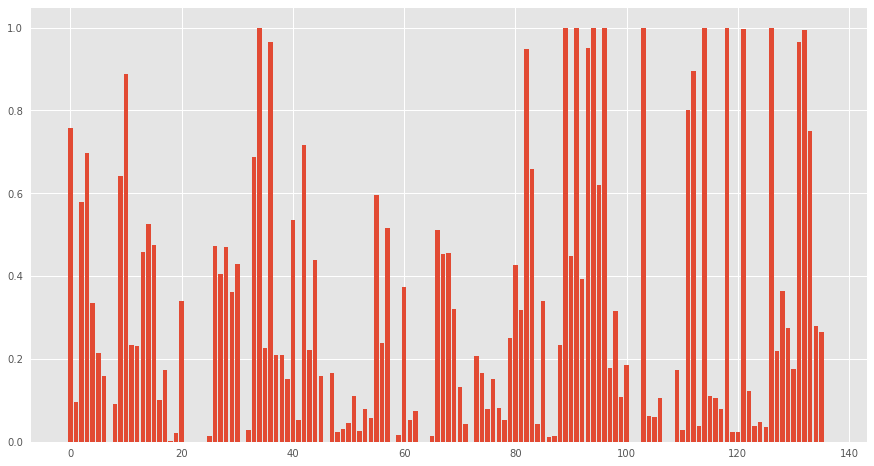

In [161]:
#### import numpy as np 
import matplotlib.pyplot as plt 

figure = plt.figure(figsize=(15,8))
pts = np.arange(len(y_dis_sim))

p = plt.bar(pts, height= y_dis_sim)


#for i in range(0,test_data.shape[0]):
#    p.patches[i].set_color(color_list[i])
    

plt.show()

<b style = "color : green" >(III) Altering the table structure to aid the Cytooscape Vis</b>

In [1]:
disp_data['Dest_url'] = ""

for i in range(0,len(disp_data)):
    if(i is not len(disp_data)-1 ):
        disp_data['Dest_url'].iloc[i] = disp_data['url'].iloc[i+1]
    else:
        disp_data['Dest_url'].iloc[i] = "END"

NameError: name 'disp_data' is not defined

In [21]:
tst = disp_data
#tst.pop('id')
#tst.pop('lastVisitTime')
#tst.pop('title')
#tst.pop('visitCount')
#tst.pop('timeSpent')
#tst.pop('Internal_category')

tst


,id,lastVisitTime,title,url,visitCount,timeSpent,Internal_category,sim_val,Dest_url
70,618,7/14/2017 6:18:19 PM,Content-based Recommender Systems: State of th...,https://link.springer.com/chapter/10.1007/978-...,1,363,General,0.000000,http://delivery.acm.org/10.1145/250000/245121/...
71,615,7/14/2017 6:17:57 PM,NaN,http://delivery.acm.org/10.1145/250000/245121/...,1,22,General,1.000000,http://dl.acm.org/citation.cfm?id=245121
73,613,7/14/2017 6:17:33 PM,Recommender systems,http://dl.acm.org/citation.cfm?id=245121,1,23,General,0.000000,http://citeseerx.ist.psu.edu/search?q=citation...
77,609,7/13/2017 7:14:23 PM,CiteSeerX — Search Results — citation graph,http://citeseerx.ist.psu.edu/search?q=citation...,1,NA,General,0.976733,http://citeseerx.ist.psu.edu/search?q=citation...
78,608,7/13/2017 7:14:06 PM,CiteSeerX — Search Results — citation graph of...,http://citeseerx.ist.psu.edu/search?q=citation...,1,17,General,0.369387,http://citeseerx.ist.psu.edu/viewdoc/summary?d...
79,607,7/13/2017 7:12:59 PM,CiteSeerX — Digital libraries and autonomous c...,http://citeseerx.ist.psu.edu/viewdoc/summary?d...,1,67,General,0.305574,http://citeseerx.ist.psu.edu/about/site
80,606,7/13/2017 7:09:54 PM,CiteSeerX — About CiteSeerX,http://citeseerx.ist.psu.edu/about/site,1,185,General,0.000000,http://citeseerx.ist.psu.edu/viewdoc/download?...
81,597,7/13/2017 7:08:57 PM,NaN,http://citeseerx.ist.psu.edu/viewdoc/download?...,1,57,General,0.000000,http://citeseerx.ist.psu.edu/viewdoc/summary?d...
82,605,7/13/2017 7:06:57 PM,CiteSeerX — CSSeer: an Expert Recommendation S...,http://citeseerx.ist.psu.edu/viewdoc/summary?d...,1,120,General,0.135332,http://citeseerx.ist.psu.edu/search?q=dataset+...
83,604,7/13/2017 7:05:56 PM,CiteSeerX — Search Results — dataset of citeseerx,http://citeseerx.ist.psu.edu/search?q=dataset+...,1,61,General,0.000000,http://eprints.biblio.unitn.it/1671/


<b style = "color : green" >(IV) Exporting the Final Dataframe to .csv file to visualise</b>

In [22]:
disp_data.to_csv("~/Desktop/res.csv", sep=',', encoding='utf-8')